# DS 3000 HW 5 

Due: Sunday July 20th @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file and the a `PDF` file included with the coding results to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted files represent your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the files to gradescope. 

**Notice that this is a group assignment. Each group only need to submit one copy and when you submit the work, please include everyone in your group.**

### Tips for success
- Start early
- Make use of Piazza
- Make use of Office hour
- Remember to use cells and headings to make the notebook easy to read (if a grader cannot find the answer to a problem, you will receive no points for it)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity), though you are welcome to **talk about** (not show each other) the problems.

## Project proposal

For this course, we aim to complete a data analysis project about the the game [Palworld](https://en.wikipedia.org/wiki/Palworld). To help you start with the project, here are a couple of things you need to consider and work on to get a clean data for later analysis. 

To start with the project, please take some time to get familiar with the game. You don't need to play it but please at least know the basic terminologies, like what is a Pal. (And also, if you do play it, please do not spend too much time on it.)

The two recommended database is [https://palworld.gg/](https://palworld.gg/) and [https://paldb.cc/en/](https://paldb.cc/en/). You can use either, or both, or some other database about the Palworld. 

### Part 1.1 (10 points)

1. Are a Pal's work suitability scores (like Kindling, Planting, etc.) related to their elemental type? For example, do Fire-type Pals tend to have higher Kindling scores?

2. Which features (like element type, size, rarity) may affect a Pal's base power level and stats (HP, Attack, etc.)?

3. Based on work suitability scores and element types, which Pals are most similar in terms of their utility for base building and resource gathering?


### Part 1.2 (20 points)

Based on the questions we proposed in the part 1.1, what features we may need to include in the analysis? Check the websites, which website has those information? **You need to pick at least 8 features for analysis.** We recommend a mix of numerical (numbers etc.) and categorical (level etc.) features. Is there any other features that you think it may be important but hard to extract or find on the website (can be something in or not in the game)?

1. Number of Work Suitabilities: The number of different work types a Pal can perform (e.g., 1, 2, 3). This measures versatility and can be correlated with rarity or element type to determine if more versatile Pals are also rarer or stronger.
2. Pal ID Number: A numerical identifier for each Pal (e.g., #100). Useful for indexing and dataset integrity, though not for direct analysis.
3. Element Type: The elemental type(s) of the Pal (e.g., Fire, Earth, Dark, etc.). This is crucial for understanding how elemental types relate to work suitability and combat stats.
4. Rarity: The rarity tier of the Pal (e.g., Common, Rare, Epic, Legendary). Can be used to analyze trends in strength, utility, or drop rates.
5. Work Suitability Types: The kinds of work the Pal is suitable for (e.g., Handiwork, Mining, Transporting). These can help us study which work categories are most associated with certain elements or rarities.
6. Work Suitability Levels: Numerical levels indicating how effective a Pal is at a certain task (e.g., Lv 4 Handiwork). Useful for quantitative comparisons.
7. HP: The base health points of the Pal. Important for combat-related analysis and can be compared against element types and rarity.
8. Defense: The Pal’s defensive stat. Like HP, this can be used to explore if stronger defensive Pals trend toward certain types or rarities.

### Part 1.3 (20 points)

Suppose you do have all the features you mentioned in part 1.2. List 3-4 data visulizations you can make with those features. You do not need to make those visulizations here. Just describe the type of the visualizations (histogram, scatter plot etc. ), which features are involved, will there any hover data or color being added, and **discuss how these data visualizations may be related (or even answer) to your questions in part 1.1**. 

1. Scatter Plot – Work Suitability Level vs. HP
- X-axis: Highest Work Suitability Level
- Y-axis: HP
- Color: Element Type
- Hover Info: Pal ID, Rarity, Work Types
- Why: To see if there’s a tradeoff between combat readiness (HP) and labor value (work level). Helps address question 1: Do elemental types affect work suitability scores?
2. Grouped Bar Chart – Average Work Suitability Level by Element Type
- X-axis: Element Types
- Y-axis: Avg Work Level (split by work type: Mining, Transport, etc.)
- Color: Work Type
- Why: This directly addresses question 1 and 3 — seeing if, say, Fire-types are better at Kindling or if Water-types are better at Cooling.
3. Heatmap – Rarity vs. Number of Work Suitabilities
- Axes: Rarity (Y) × Number of Work Suitabilities (X)
- Color: Frequency (how many Pals fall into each combination)
- Why: Helps answer: Are rarer Pals more versatile? This addresses the updated feature 1 and part of question 2.
4. Boxplot – HP and Defense Distribution by Rarity
- X-axis: Rarity
- Y-axis: HP or Defense
- Color: Element Type (optional)
- Why: To examine the relationship between rarity and battle strength. This supports question 2 — How do different features (like rarity or element) affect base stats?

### Part 1.4  (50 points)

Now, go ahead and try to scrape the features you need. 

Please show all the codes you have for web scrapping. Your current output data frame should include at least 4 features. (You do not need to scrape all features at this moment, although it is recommend to start earlier. Also, you can choose to not to use the ones you have scraped in the later analysis. No need to worry if you need to change anything later). **Please design your code in pipeline and clearly document each function.** See the Python Style Guide in Week 1 for proper documentation. It is also recommended to save the data you have scrapped.

Note: The above code is a template and you'll need to adjust the class names and HTML structure according to the actual website you're scraping (palworld.gg or paldb.cc). The key is to get data for all Pals at once to enable meaningful analysis later.


In [97]:
# scrape palID
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import plotly.express as px

def scrape_pal_ids(url = "https://palworld.gg/pals"):
    """
    Scrape Pal IDs from the given URL.

    Args:
        url (str): The URL of the Palworld database page, assumed to be the current link unless otherwise specified.

    Returns:
        DataFrame: A dataFrame of Pal names and IDs.
    """
    response = requests.get(url).text
    soup = BeautifulSoup(response)

    # Find all Pal ID elements
    pal_dict = {}
    for pal in soup.find_all("div", class_ = "pal"):

        # Remove empty Pal entries.
        if pal.attrs["style"] == "display:none;":
            continue

        # Get the ID and name of the Pal and add them to the dictionary.
        pal_id_element = pal.find('span', class_='index').text.strip()
        pal_dict[pal.find("div", class_ = "name").next_element.strip()] = pal_id_element

    # Convert the dictionary to a DataFrame before returning it.
    return pd.DataFrame().from_dict(pal_dict, orient = "index", columns = ["ID"])

pal_frame = scrape_pal_ids()
pal_frame

KeyboardInterrupt: 

In [ ]:
# Scrape the rarity of all the Pals
def scrape_pal_rarity(pal_df, url = "https://palworld.gg/pals"):
    """
    Scrape the rarity of each Pal listed in the database.

    Args:
        url (str): The URL of the database page, assumed to be the current link unless otherwise specified.
        pal_df (DataFrame): The DataFrame of Pal data to update.

    Returns:
        pal_df (DataFrame): The DataFrame given, with the rarity of each Pal added under a new column.
    """
    soup = BeautifulSoup(requests.get(url).text)

    # Find all Pals, then find each of their rarities.
    pal_tag = soup.find_all("div", class_ = "pal")
    for pal in pal_tag:

        # Remove empty Pal entries.
        if pal.attrs["style"] == "display:none;":
            continue

        # The "name" class is used twice in each Pal entry, first for their name, then for their rarity.
        name_class = pal.find_all("div", class_ = "name")
        # (Using next_element here rather than .text to avoid also getting the text from the nested children.)
        # Add the rarity of the Pal to the DataFrame under its name.
        pal_df.loc[name_class[0].next_element.strip(), "Rarity"] = name_class[1].next_element

    return pal_df


pal_frame = scrape_pal_rarity(pal_frame)
pal_frame

,ID,Rarity
Anubis,#100,Epic
Arsox,#42,Common
Astegon,#98,Epic
Azurmane,#136,Rare
Azurobe,#82,Rare
...,...,...
Wumpo Botan,#91,Epic
Xenogard,#126,Epic
Xenolord,#127,Epic
Xenovader,#125,Rare


In [ ]:
# Scrape the elements of the Pals
def scrape_pal_elements(pal_df, url = "https://palworld.gg/pals"):
    """
    Scrape the element or elements of each Pal listed in the database.

    Args:
        url (str): The URL of the database page, assumed to be the current link unless otherwise specified.
        pal_df (DataFrame): The DataFrame of Pal data to update.

    Returns:
        pal_df (DataFrame): The DataFrame given, with a dummy variable added for each element,
        True meaning that a Pal does belong to them and False for not.
    """
    soup = BeautifulSoup(requests.get(url).text)

    # Find each Pal entry.
    pal_tag = soup.find_all("div", class_ = "pal")
    for pal in pal_tag:
        # Remove empty Pal entries.
        if pal.attrs["style"] == "display:none;":
            continue

        # Load the individual entry page for the Pal.
        pal_page = requests.get("https://palworld.gg" + pal.a.attrs["href"]).text
        pal_soup = BeautifulSoup(pal_page)

        # Scrape the Pal's name.
        pal_name = pal_soup.find("h1", class_ = "name").text.strip()

        # Initialize all the element column values for this Pal to False, as none have been found yet.
        pal_df.loc[pal_name, ["Earth", "Fire", "Dragon", "Dark", "Electricity", "Water", "Ice", "Leaf", "Normal"]] = False

        # Scrape the elements of the Pal.
        pal_elems_tags = pal_soup.find("div", class_ = "elements").find_all("div", class_ = "name")
        for tag in pal_elems_tags:
            # For each found element, change the Pal's value in the corresponding column to True.
            pal_df.loc[pal_name, tag.text] = True
        
    return pal_df

pal_frame = scrape_pal_elements(pal_frame)
pal_frame

,ID,Rarity,Earth,Fire,Dragon,Dark,Electricity,Water,Ice,Leaf,Normal
Anubis,#100,Epic,True,False,False,False,False,False,False,False,False
Arsox,#42,Common,False,True,False,False,False,False,False,False,False
Astegon,#98,Epic,False,False,True,True,False,False,False,False,False
Azurmane,#136,Rare,False,False,False,False,True,False,False,False,False
Azurobe,#82,Rare,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Wumpo Botan,#91,Epic,False,False,False,False,False,False,False,True,False
Xenogard,#126,Epic,False,False,True,False,False,False,False,False,False
Xenolord,#127,Epic,False,False,True,True,False,False,False,False,False
Xenovader,#125,Rare,False,False,False,True,False,False,False,False,False


In [ ]:
# Create Element Type column from one-hot element columns
element_cols = ["Earth", "Fire", "Dragon", "Dark", "Electricity", "Water", "Ice", "Leaf", "Normal"]

def get_element_type(row):
    for col in element_cols:
        if col in row.index and row[col] > 0:
            return col
    return "Unknown"

pal_frame["Element Type"] = pal_frame.apply(get_element_type, axis=1)

# Define fixed colors for each element
element_colors = {
    "Earth": "#8B4513",        # SaddleBrown
    "Fire": "#FF4500",         # OrangeRed
    "Dragon": "#800080",       # Purple
    "Dark": "#2F4F4F",         # DarkSlateGray
    "Electricity": "#FFD700",  # Gold
    "Water": "#1E90FF",        # DodgerBlue
    "Ice": "#00CED1",          # DarkTurquoise
    "Leaf": "#228B22",         # ForestGreen
    "Normal": "#A9A9A9",       # DarkGray
    "Unknown": "#808080"       # Gray
}

In [ ]:
# Scrape the work suitability of the Pals
def scrape_pal_work(pal_df, url = "https://palworld.gg/pals"):
    """
    Scrape the work suitabilities of each Pal listed in the database, including the level of each work type.

    Args:
        url (str): The URL of the database page, assumed to be the current link unless otherwise specified.
        pal_df (DataFrame): The DataFrame of Pal data to update.

    Returns:
        pal_df (DataFrame): The DataFrame given, with 13 new columns added: 12 representing the work suitabilities
        of Pals, each filled with NaN or the Pal's skill level for that task, and one column counting the number of suitabilities
        the Pal has in total.
    """
    soup = BeautifulSoup(requests.get(url).text)

    # Find each Pal entry.
    pal_tag = soup.find_all("div", class_ = "pal")
    for pal in pal_tag:
        # Remove empty Pal entries.
        if pal.attrs["style"] == "display:none;":
            continue

        # Load the individual entry page for the Pal.
        pal_page = requests.get("https://palworld.gg" + pal.a.attrs["href"]).text
        pal_soup = BeautifulSoup(pal_page)

        # Scrape the name of the Pal.
        pal_name = pal_soup.find("h1", class_ = "name").text.strip()

        # Scrape the suitabilities of the Pal, and for each one that is found add its level to the column with the suitability's name.
        pal_work_tags = pal_soup.find("div", class_ = "works").find_all("div", class_ = "active item")
        for tag in pal_work_tags:
            pal_df.loc[pal_name, tag.find("div", class_ = "name").text] = tag.find("span", class_ = "value").text
        # Add the pal's total number of suitabilities as a new column.
        pal_df.loc[pal_name, "Number of work suitabilities"] = len(pal_work_tags)
        
    return pal_df

pal_frame = scrape_pal_work(pal_frame)
pal_frame

,ID,Rarity,Earth,Fire,Dragon,Dark,Electricity,Water,Ice,Leaf,...,Number of work suitabilities,Deforesting,Kindling,Gathering,Generating Electricity,Watering,Cooling,Farming,Medicine Production,Planting
Anubis,#100,Epic,True,False,False,False,False,False,False,False,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arsox,#42,Common,False,True,False,False,False,False,False,False,...,2.0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Astegon,#98,Epic,False,False,True,True,False,False,False,False,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Azurmane,#136,Rare,False,False,False,False,True,False,False,False,...,2.0,NaN,NaN,1,4,NaN,NaN,NaN,NaN,NaN
Azurobe,#82,Rare,False,False,True,False,False,True,False,False,...,1.0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wumpo Botan,#91,Epic,False,False,False,False,False,False,False,True,...,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Xenogard,#126,Epic,False,False,True,False,False,False,False,False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Xenolord,#127,Epic,False,False,True,True,False,False,False,False,...,1.0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
Xenovader,#125,Rare,False,False,False,True,False,False,False,False,...,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Scrape the HP of the Pals
def scrape_pal_hp(pal_df, url = "https://palworld.gg/pals"):
    """
    Scrape the HP of each Pal listed in the database.

    Args:
        url (str): The URL of the database page, assumed to be the current link unless otherwise specified.
        pal_df (DataFrame): The DataFrame of Pal data to update.

    Returns:
        pal_df (DataFrame): The DataFrame given, with a new column representing the Pals' HPs.
    """
    soup = BeautifulSoup(requests.get(url).text)

    # Find each Pal entry.
    pal_tag = soup.find_all("div", class_ = "pal")
    for pal in pal_tag:
        # Remove empty Pal entries.
        if pal.attrs["style"] == "display:none;":
            continue

        # Load the individual entry page for the Pal.
        pal_page = requests.get("https://palworld.gg" + pal.a.attrs["href"]).text
        pal_soup = BeautifulSoup(pal_page)

        # Scrape the name of the Pal.
        pal_name = pal_soup.find("h1", class_ = "name").text.strip()

        # Scrape the HP of the pal (the first entry in the stats section) and add it to the HP column.
        pal_hp = int(pal_soup.find("div", class_ = "stats").find_all("div", class_ = "value")[0].text)
        pal_df.loc[pal_name, "HP"] = pal_hp
        
    return pal_df

pal_frame = scrape_pal_hp(pal_frame)
pal_frame

,ID,Rarity,Earth,Fire,Dragon,Dark,Electricity,Water,Ice,Leaf,...,Deforesting,Kindling,Gathering,Generating Electricity,Watering,Cooling,Farming,Medicine Production,Planting,HP
Anubis,#100,Epic,True,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
Arsox,#42,Common,False,True,False,False,False,False,False,False,...,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0
Astegon,#98,Epic,False,False,True,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
Azurmane,#136,Rare,False,False,False,False,True,False,False,False,...,NaN,NaN,1,4,NaN,NaN,NaN,NaN,NaN,130.0
Azurobe,#82,Rare,False,False,True,False,False,True,False,False,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wumpo Botan,#91,Epic,False,False,False,False,False,False,False,True,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,140.0
Xenogard,#126,Epic,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0
Xenolord,#127,Epic,False,False,True,True,False,False,False,False,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,130.0
Xenovader,#125,Rare,False,False,False,True,False,False,False,False,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0


In [ ]:
# Scrape the defense statistics of the Pals
def scrape_pal_defense(pal_df, url = "https://palworld.gg/pals"):
    """
    Scrape the defense score of each Pal listed in the database.

    Args:
        url (str): The URL of the database page, assumed to be the current link unless otherwise specified.
        pal_df (DataFrame): The DataFrame of Pal data to update.

    Returns:
        pal_df (DataFrame): The DataFrame given, with a new column representing the Pals' defense scores.
    """
    soup = BeautifulSoup(requests.get(url).text)

    # Find each Pal entry.
    pal_tag = soup.find_all("div", class_ = "pal")
    for pal in pal_tag:
        # Remove empty Pal entries.
        if pal.attrs["style"] == "display:none;":
            continue

        # Load the individual entry page for the Pal.
        pal_page = requests.get("https://palworld.gg" + pal.a.attrs["href"]).text
        pal_soup = BeautifulSoup(pal_page)

        # Scrape the name of the Pal.
        pal_name = pal_soup.find("h1", class_ = "name").text.strip()

        # Scrape the defense of the pal (the second entry in the stats section) and add it to the defense column.
        pal_hp = int(pal_soup.find("div", class_ = "stats").find_all("div", class_ = "value")[1].text)
        pal_df.loc[pal_name, "Defense"] = pal_hp
        
    return pal_df

pal_frame = scrape_pal_defense(pal_frame)
pal_frame

,ID,Rarity,Earth,Fire,Dragon,Dark,Electricity,Water,Ice,Leaf,...,Kindling,Gathering,Generating Electricity,Watering,Cooling,Farming,Medicine Production,Planting,HP,Defense
Anubis,#100,Epic,True,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,100.0
Arsox,#42,Common,False,True,False,False,False,False,False,False,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,95.0
Astegon,#98,Epic,False,False,True,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,125.0
Azurmane,#136,Rare,False,False,False,False,True,False,False,False,...,NaN,1,4,NaN,NaN,NaN,NaN,NaN,130.0,110.0
Azurobe,#82,Rare,False,False,True,False,False,True,False,False,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,110.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wumpo Botan,#91,Epic,False,False,False,False,False,False,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,140.0,110.0
Xenogard,#126,Epic,False,False,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,130.0
Xenolord,#127,Epic,False,False,True,True,False,False,False,False,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,130.0,120.0
Xenovader,#125,Rare,False,False,False,True,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0


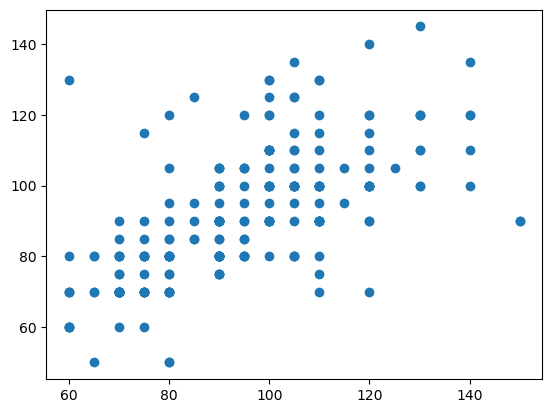

In [ ]:
# todo: start visualizing the data in graphs and plotting fits for relationships
import matplotlib.pyplot as plt

# just a little graph for fun
plt.scatter(x = pal_frame["HP"], y = pal_frame["Defense"])

In [ ]:
import pandas as pd
import plotly.express as px


# --- Detect work-type columns ---
work_list = ['Handiwork', 'Mining',
       'Transporting', 'Deforesting',
       'Kindling', 'Gathering', 'Generating Electricity', 'Watering',
       'Cooling', 'Farming', 'Medicine Production', 'Planting']
work_columns = pal_frame[work_list]


def build_features(df, work_cols):
    out = df.copy()
    for idx in range(len(work_cols)):
        pal = work_cols.iloc[idx, :]
        pal = pal.dropna()
        out.loc[pal.name, "Highest Work Suitability Level"] = pal.sort_values(ascending = False).iloc[0]
        out.loc[pal.name, "Work Types"] = ", ".join(pal.index)
        out.loc[pal.name, "Work Skill Count"] = len(pal.index)

    return out

# --- Prepare data ---
pal_frame_vis = build_features(pal_frame, work_columns)

# --- 1. Scatter Plot ---
fig1 = px.scatter(
    pal_frame_vis.sort_values(by = "Highest Work Suitability Level", ascending = True),
    x="Highest Work Suitability Level",
    y="HP",
    color="Element Type",
    hover_data={"ID":True, "Rarity":True, "Work Types":True},
    title="Work Suitability vs HP by Element Type"
)
fig1.show()

# --- 2. Grouped Bar Chart ---
melted = pal_frame_vis.melt(
    id_vars=["Element Type"],
    value_vars=work_columns,
    var_name="Work Type",
    value_name="Level"
)
melted["Level"] = pd.to_numeric(melted["Level"], errors="coerce")
melted = melted.dropna(subset=["Level"])
    
agg_df = (melted.groupby(["Element Type", "Work Type"], as_index=False, observed=True)
          .agg(Level=("Level", "mean")))
    
fig2 = px.bar(
    agg_df,
    x="Element Type", y="Level", color="Work Type",
    barmode="group",
    title="Average Work Suitability Level by Element Type & Work Type"
)
fig2.show()


# --- 3. Heatmap ---
heat_df = pal_frame_vis.groupby(["Rarity","Work Skill Count"]).size().reset_index(name="Count")
fig3 = px.density_heatmap(
    heat_df,
    x="Work Skill Count", y="Rarity", z="Count", color_continuous_scale="Viridis",
    title="Rarity vs. Number of Work Suitabilities (Frequency)"
)
fig3.show()

# --- 4. Boxplots ---
fig4 = px.box(pal_frame_vis, x="Rarity", y="HP", color="Element Type",
              title="HP Distribution by Rarity")
fig4.show()
fig5 = px.box(pal_frame_vis, x="Rarity", y="Defense", color="Element Type",
              title="Defense Distribution by Rarity")
fig5.show()
